### Import modules

In [10]:
import networkx as nx
import graph_bandit_RL
from graph_bandit_helper_tools import *
np.random.seed(1)
from known_rewards_helper_functions import all_paths

%load_ext autoreload
%autoreload 2

# Debugging time complexity (ignore this)

In [245]:
def complexity_test():
    T = 1000
    n_samples = 1000
    episodes = 1
    n_nodes = 10
    mu_size = 1
    sigma_size = 1
    update_period = 1
    n_children = 3

    # For Q-learning
    epsilon = 0.5
    epsilon_discount=0.99

    # Select algorithms to run
    algorithms = ['greedy', 'thompson', 'UCB', 'Q_learning', 'Q_table_UCB', 'Q_table_Thompson']
    # Create the graph
    G = return_graph('fully_connected', n_nodes)

    # Train agents
    fully_connected_regrets, fully_connected_successes = testLearning(episodes=episodes, T=T, n_samples=n_samples, epsilon=epsilon,\
                              epsilon_discount=epsilon_discount,\
                              algorithms=algorithms, G=G, means=None, stdevs=None, mean_magnitude=mu_size,\
                              stdev_magnitude=sigma_size, update_multiple_qs=True, update_frequency=update_period)



In [12]:
# import cProfile
# cProfile.run('complexity_test()', 'Debugging/output.dat')

In [13]:
# import pstats
# from pstats import SortKey
# with open('Debugging/output_time.txt', 'w') as f:
#     p = pstats.Stats('Debugging/output.dat', stream=f)
#     p.sort_stats('time').print_stats()
# with open('Debugging/output_calls.txt', 'w') as f:
#     p = pstats.Stats('Debugging/output.dat', stream=f)
#     p.sort_stats('calls').print_stats()

### Define parameters

Define the following parameters:  
$\texttt{T}:$ game length  
$\texttt{n_samples}:$ number of games to run   
$\texttt{episodes}:$ number of episodes; Let this be 1 for now 
$\texttt{n_nodes}:$ number of nodes in graph. 
$\texttt{mu_size}:$ the node means are drawn as $\mu\sim \texttt{mu_size}\times \mathcal{N}(0,1)$   
$\texttt{sigma_size}:$ the node standard deviations are set to $\texttt{sigma_size}$ 
$\texttt{epsilon}:$ exploration parameter (only applicable for Q-learning algorithms)  
$\texttt{epsilon_discount}:$ exploration discount parameter (only applicable for Q-learning algorithms)  
$\texttt{algorithms}:$ the algorithms to run. 
$\texttt{time_varying}:$ True if distributions are time-varying. 
$\texttt{N}:$ If time_varying, this is the memory length of Q-graph algortihm.
$\texttt{a}:$ This is the "alpha"-vector in the time-varying model.




 



In [304]:
T = 1000
n_samples = 100
episodes = 1
n_nodes = 10
mu_size = 1
sigma_size = 1
update_period = 10
n_children = 3
eta=0.01
a=[1 for _ in range(n_nodes)]
time_varying=False
N=10


# For Q-learning
epsilon = 0.5
epsilon_discount=0.99

# Select algorithms to run
algorithms = ['greedy', 'thompson', 'UCB', 'Q_learning', 'Q_table_UCB', 'Q_table_Thompson']
# algorithms = ['thompson', 'UCB', 'Q_table_UCB', 'Q_table_Thompson']

# algorithms = ['Q_table_UCB']





# Fully connected graph

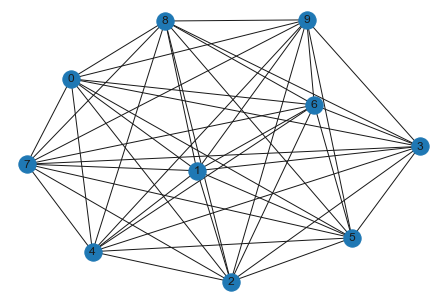

In [62]:
G = return_graph('fully_connected', n_nodes)
draw_graph(G)

In [ ]:
# Create the graph
G = return_graph('fully_connected', n_nodes)

# Train agents
fully_connected_regrets, fully_connected_successes = testLearning(episodes=episodes, T=T, n_samples=n_samples, epsilon=epsilon,\
                  epsilon_discount=epsilon_discount,\
                  algorithms=algorithms, G=G, means=None, stdevs=None, mean_magnitude=mu_size,\
                  stdev_magnitude=sigma_size, update_multiple_qs=True, update_frequency=update_period,
                                                                 eta=eta, a=a,\
                                                                 time_varying=time_varying,N=N)



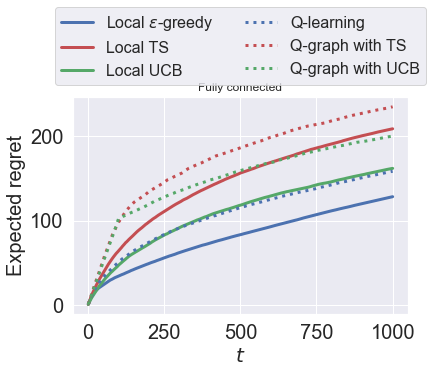

In [101]:
plotRegrets([fully_connected_regrets], titles=['Fully connected'])

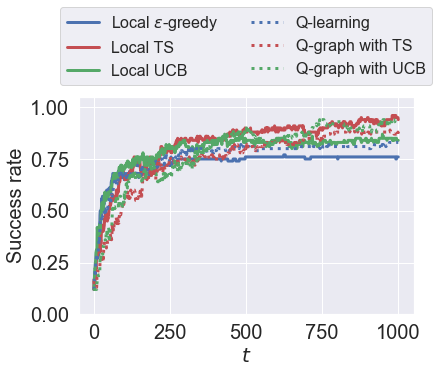

In [87]:
plotSuccesses(fully_connected_successes)

# Line graph

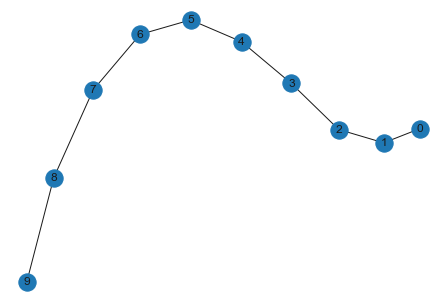

In [270]:
G = return_graph('line', n_nodes)
draw_graph(G)

In [301]:
# Create the graph
G = return_graph('line', n_nodes)

# Train agents
line_regrets, line_successes = testLearning(episodes=episodes, T=T, n_samples=n_samples, epsilon=epsilon,\
                  epsilon_discount=epsilon_discount,\
                  algorithms=algorithms, G=G, means=None, stdevs=None, mean_magnitude=mu_size,\
                  stdev_magnitude=sigma_size, update_multiple_qs=True, update_frequency=update_period,
                                                                 eta=eta, a=a,\
                                                                 time_varying=time_varying,N=N)

100%|██████████| 100/100 [01:47<00:00,  1.08s/it]


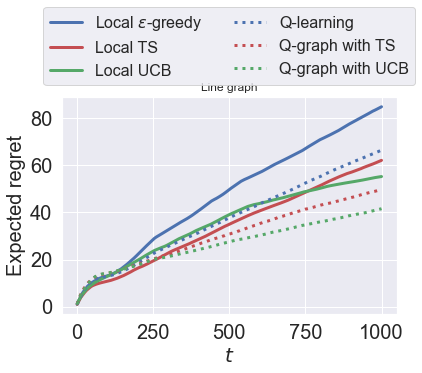

In [302]:
# Plot regrets 
plotRegrets([line_regrets], titles=['Line graph'])

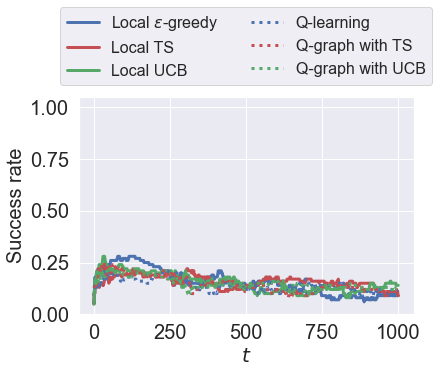

In [303]:
plotSuccesses(line_successes)

# Circle graph

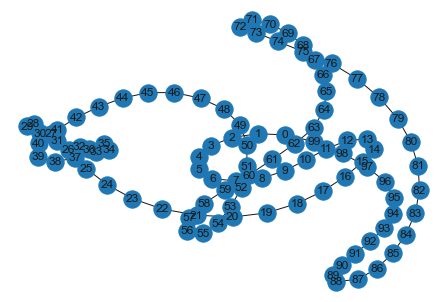

In [253]:
G = return_graph('circle', n_nodes)
draw_graph(G)

In [ ]:
# Create the graph
G = return_graph('circle', n_nodes)

# Train agents
circle_regrets, circle_successes = testLearning(episodes=episodes, T=T, n_samples=n_samples, epsilon=epsilon,\
                  epsilon_discount=epsilon_discount,\
                  algorithms=algorithms, G=G, means=None, stdevs=None, mean_magnitude=mu_size,\
                  stdev_magnitude=sigma_size, update_multiple_qs=True, update_frequency=update_period,
                                                                 eta=eta, a=a,\
                                                                 time_varying=time_varying,N=N)

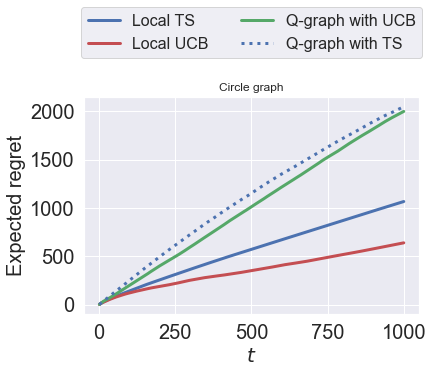

In [257]:
# Plot regrets
plotRegrets([circle_regrets], titles=['Circle graph'])

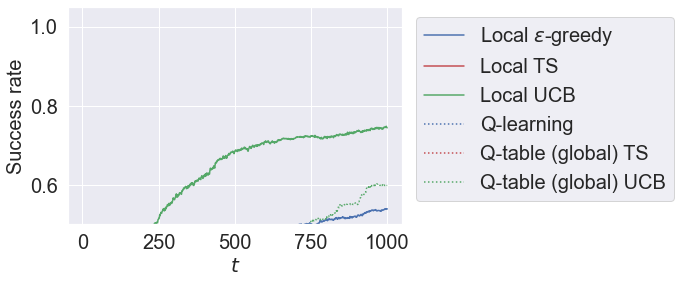

In [533]:
plotSuccesses(circle_successes)

# Star graph

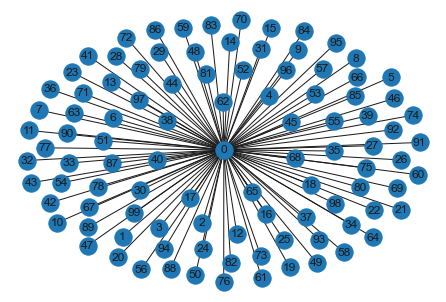

In [534]:
G = return_graph('star', n_nodes)
draw_graph(G)

In [ ]:
# Create the graph
G = return_graph('star', n_nodes)

# Train agents
star_regrets, star_successes = testLearning(episodes=episodes, T=T, n_samples=n_samples, epsilon=epsilon,\
                  epsilon_discount=epsilon_discount,\
                  algorithms=algorithms, G=G, means=None, stdevs=None, mean_magnitude=mu_size,\
                  stdev_magnitude=sigma_size, update_multiple_qs=True, update_frequency=update_period,
                                                                 eta=eta, a=a,\
                                                                 time_varying=time_varying,N=N)

In [ ]:
# Plot regrets
plotRegrets([star_regrets], titles=['Star graph'])

In [ ]:
plotSuccesses(star_successes)

# Tree graph

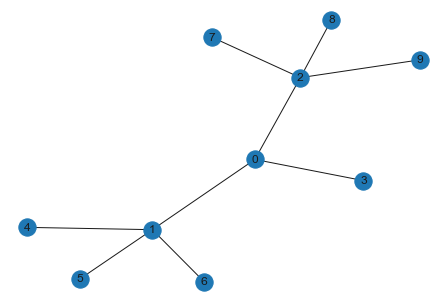

In [50]:
n_children = 3
G = return_graph(graph_type='tree', n_nodes=n_nodes, n_children=n_children)
draw_graph(G)

In [51]:
# Create the graph
n_children = 3
G = return_graph(graph_type='tree', n_nodes=n_nodes, n_children=n_children)

# Train agents
tree_regrets, tree_successes = testLearning(episodes=episodes, T=T, n_samples=n_samples, epsilon=epsilon,\
                  epsilon_discount=epsilon_discount,\
                  algorithms=algorithms, G=G, means=None, stdevs=None, mean_magnitude=mu_size,\
                  stdev_magnitude=sigma_size, update_multiple_qs=True, update_frequency=update_period,
                                                                 eta=eta, a=a,\
                                                                 time_varying=time_varying,N=N)

100%|██████████| 1000/1000 [07:07<00:00,  2.34it/s]


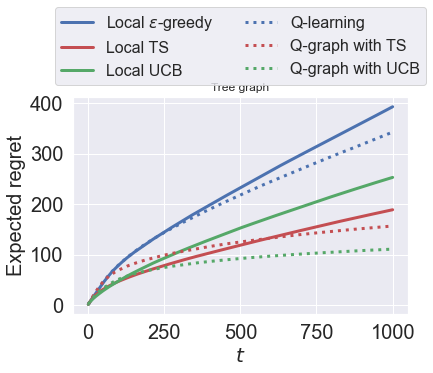

In [52]:
# Plot regrets
plotRegrets([tree_regrets], titles=['Tree graph'])

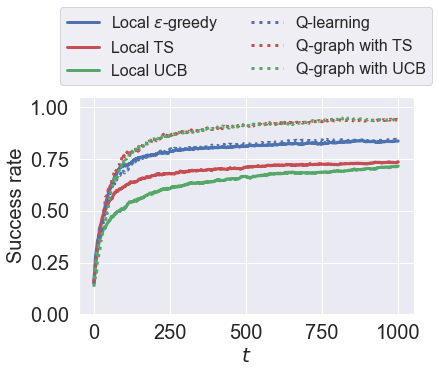

In [53]:
plotSuccesses(tree_successes)

# Maze graph

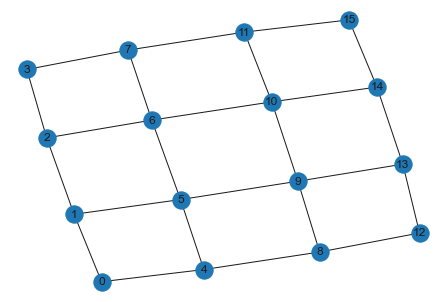

In [202]:
G = return_graph(graph_type='maze', n_nodes=n_nodes)
draw_graph(G)

In [233]:
# Create the graph
G = return_graph(graph_type='maze', n_nodes=n_nodes)

# Train agents
maze_regrets, maze_successes = testLearning(episodes=episodes, T=T, n_samples=n_samples, epsilon=epsilon,\
                  epsilon_discount=epsilon_discount,\
                  algorithms=algorithms, G=G, means=None, stdevs=None, mean_magnitude=mu_size,\
                  stdev_magnitude=sigma_size, update_multiple_qs=True, update_frequency=update_period,
                                                                 eta=eta, a=a,\
                                                                 time_varying=time_varying,N=N)

100%|██████████| 100/100 [00:42<00:00,  2.35it/s]


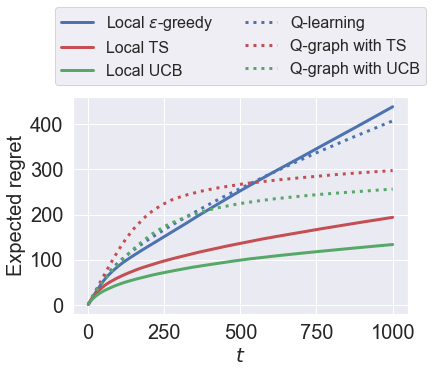

In [15]:
# Plot regrets
plotRegrets([maze_regrets])

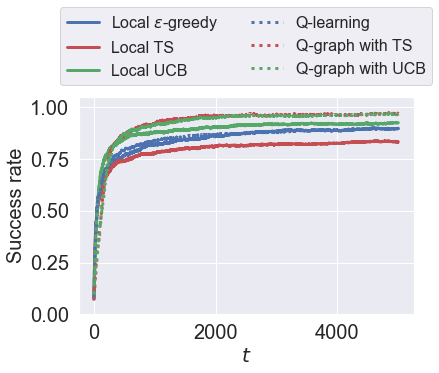

In [27]:
# Plot regrets
plotSuccesses(maze_successes)

# Save data

In [54]:
import json
# regret_types = [tree_regrets, circle_regrets, line_regrets, star_regrets]
# success_types = [tree_successes, circle_successes, line_successes, star_successes]
regret_types = [tree_regrets]
success_types = [tree_successes]


for i, regret in enumerate(regret_types):
    success = success_types[i]
    for key in regret.keys():
        try:
            regret[key] = regret[key].tolist()
        except:
            pass
        
        
    if i==10:
        file_name1 = 'maze_regrets'
        file_name2 = 'maze_successes'    
    elif i==0:
        file_name1 = 'tree_regrets'
        file_name2 = 'tree_successes'
    elif i==1:
        file_name1 = 'circle_regrets'
        file_name2 = 'circle_successes'
    elif i==2:
        file_name1 = 'line_regrets'
        file_name2 = 'line_successes'
    elif i==3:
        file_name1 = 'star_regrets'
        file_name2 = 'star_successes'
    elif i==4:
        file_name1 = 'fully_connected_regrets'
        file_name2 = 'fully_connected_successes'

    
    with open('Data/' + file_name1 + '_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
              + str(update_period) + 'steps.json', 'w') as fp:
        json.dump(regret, fp)
    with open('Data/' + file_name2 + '_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
              + str(update_period) + 'steps.json', 'w') as fp:
        json.dump(success, fp)

# Save figures from data

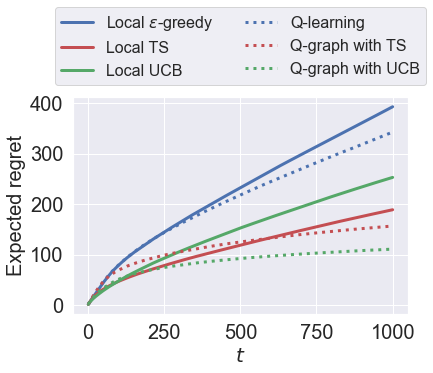

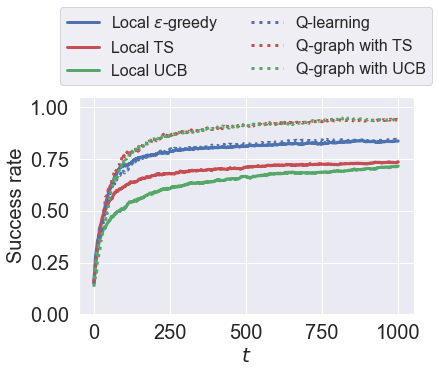

In [55]:
names = ['fully_connected', 'circle', 'tree', 'star', 'line']
names = ['tree']

for name in names:
    plot_regrets('Data/'+ name + '_regrets_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                 + str(update_period) + 'steps.json', title=None,\
             save_fig= name + '_regrets_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                 + str(update_period) +'steps')
    plot_successes('Data/'+ name + '_successes_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                 + str(update_period) + 'steps.json', title=None,\
             save_fig= name + '_successes_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                 + str(update_period) +'steps')
    

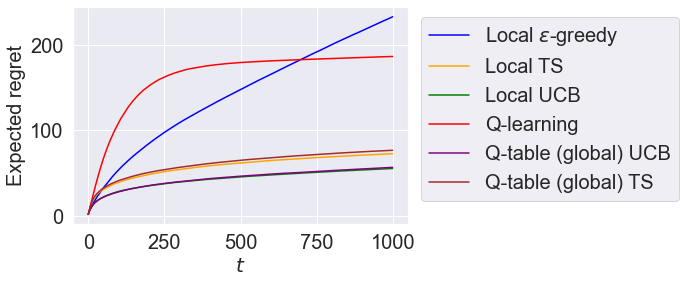

In [43]:
plot_regrets('Data/'+ 'fully_connected' + '_regrets_K=10_1000samples_updateEvery1steps.json', title=None,\
             save_fig= 'fully_connected' + '_regrets_K=10_1000samples_updateEvery1steps')

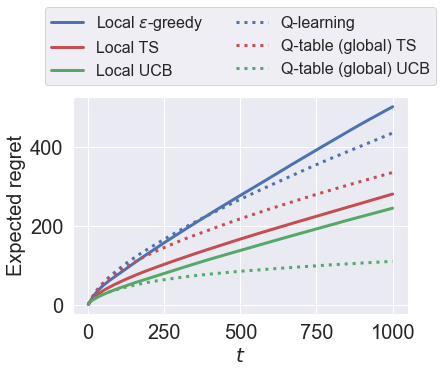

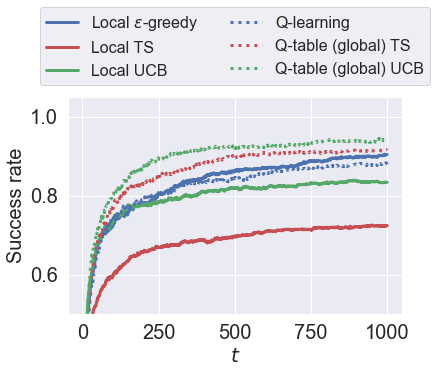

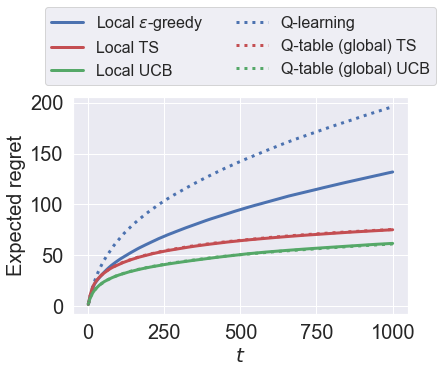

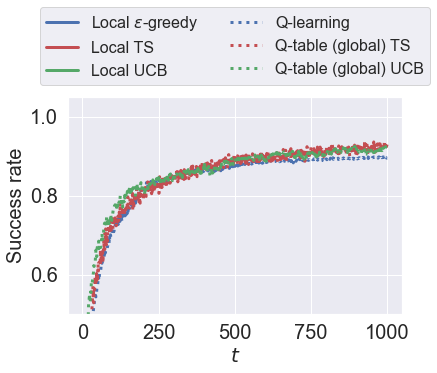

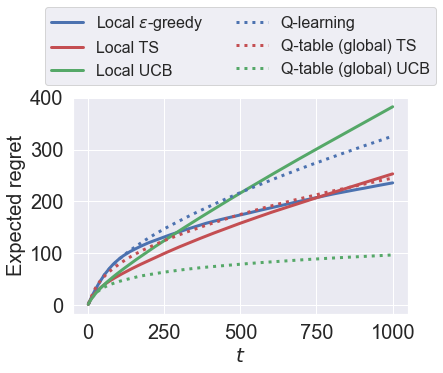

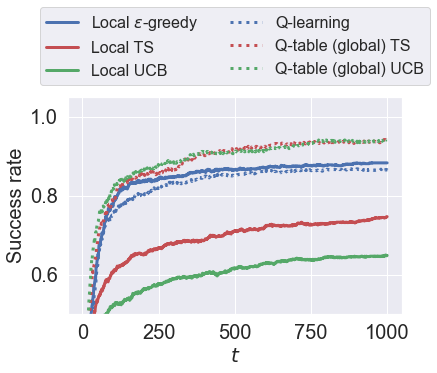

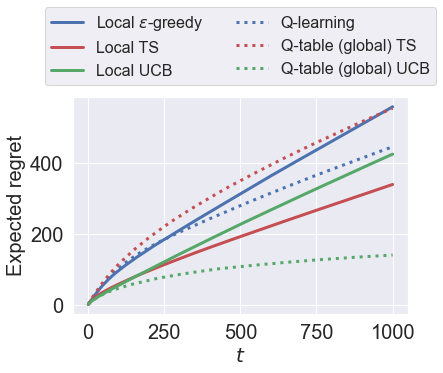

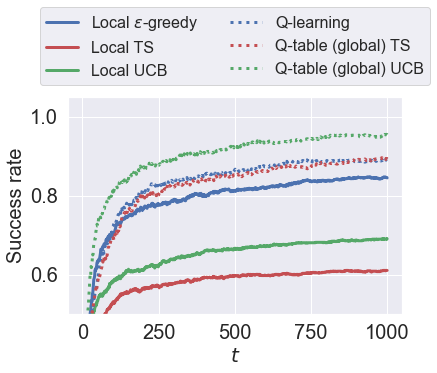

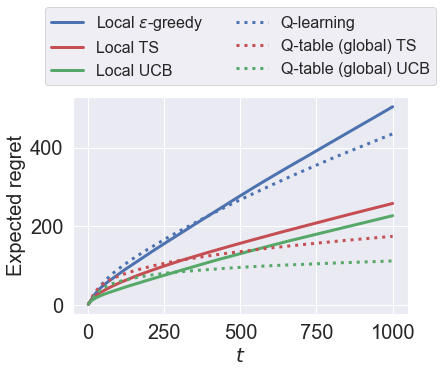

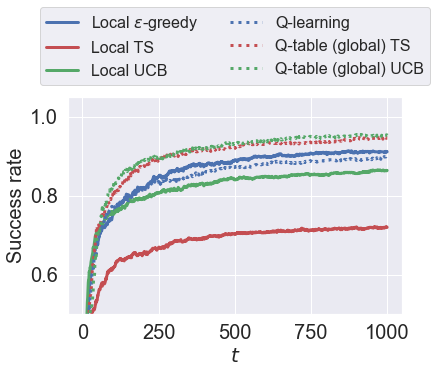

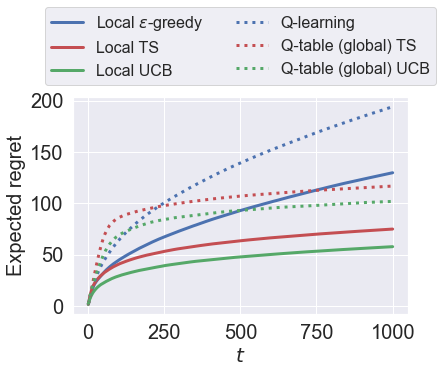

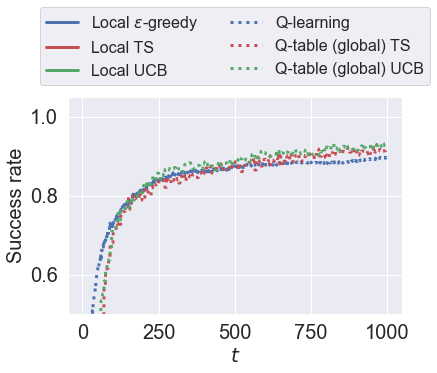

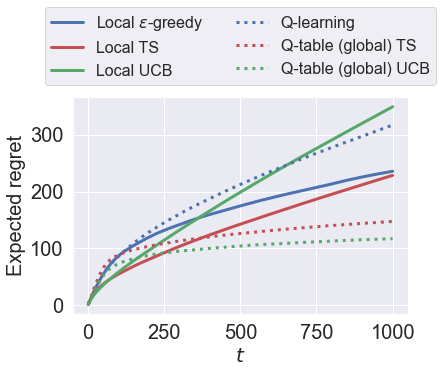

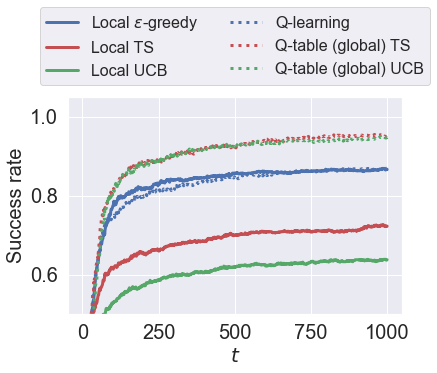

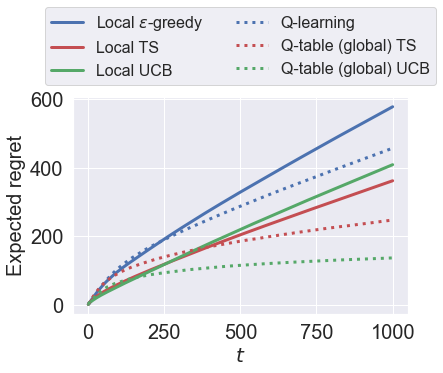

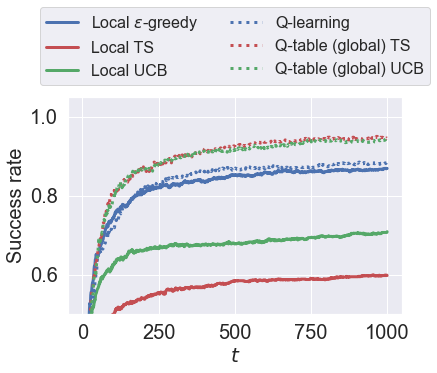

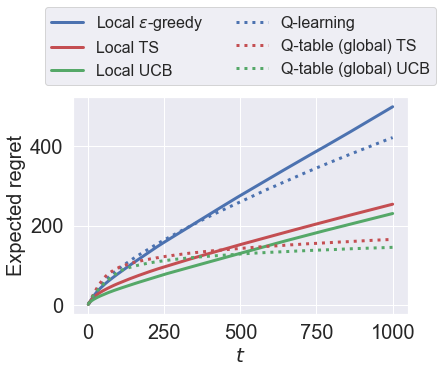

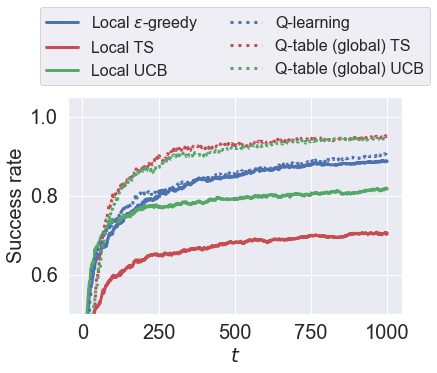

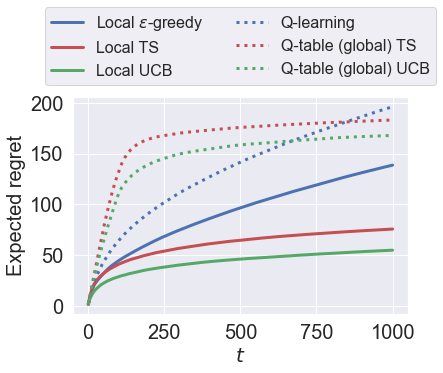

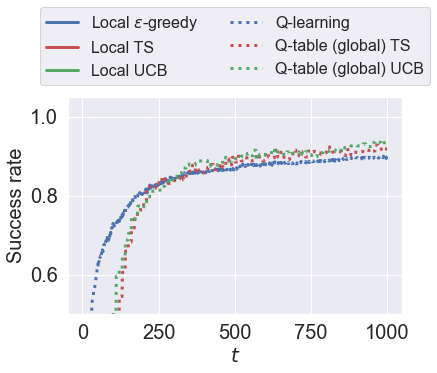

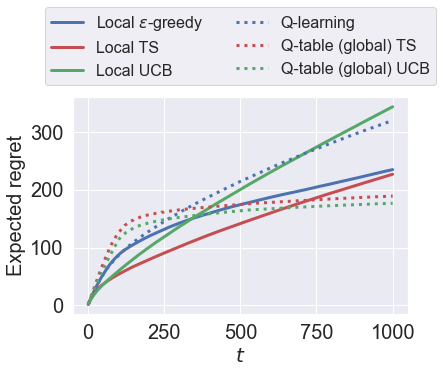

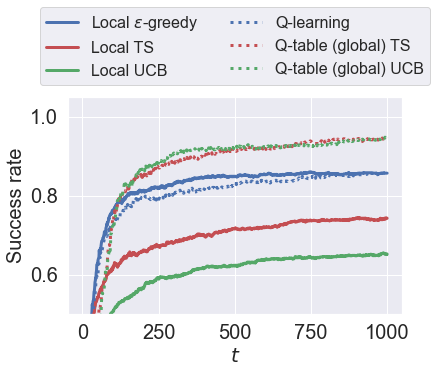

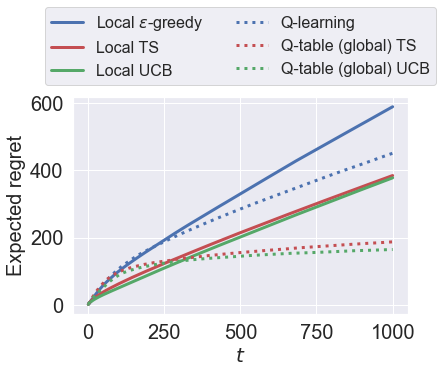

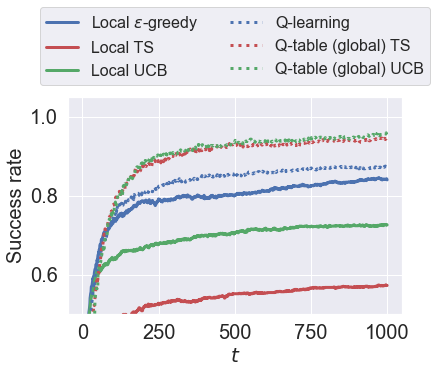

In [660]:
update_periods = [1,5,10]
for update_period in update_periods:

    for name in names:
        plot_regrets('Data/'+ name + '_regrets_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                     + str(update_period) + 'steps.json', title=None,\
                 save_fig= name + '_regrets_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                     + str(update_period) +'steps')
        plot_successes('Data/'+ name + '_successes_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                     + str(update_period) + 'steps.json', title=None,\
                 save_fig= name + '_successes_K=' + str(n_nodes) + '_' + str(n_samples) + 'samples_updateEvery'\
                     + str(update_period) +'steps')




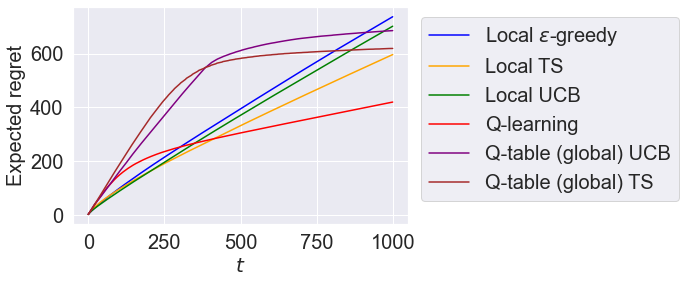

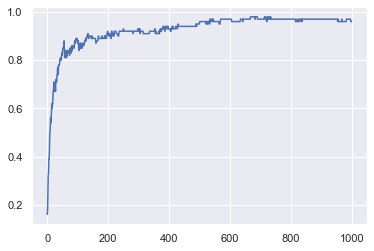

In [40]:
plt.plot(np.mean(fully_connected_successes['thompson'],axis=0))